In [22]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [23]:
### set file directory
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.tss_pol2_span.tsv"
fpath = file.path(fdiry, fname)

### read table
dat = read_tsv(fpath, show_col_types = FALSE)

### assign and show
dat_peak_annot_tss_pol2_span = dat
print(dim(dat))
head(dat)

[1] 3270027       6


Peak,Annotation,Label,Direction,TSS,Gene
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1_30803_31072,TSS_POL2_Span,0-1K,+,chr1:30365-30366,MIR1302-10
chr1_30803_31072,TSS_POL2_Span,0-1K,+,chr1:30365-30366,MIR1302-11
chr1_30803_31072,TSS_POL2_Span,0-1K,+,chr1:30365-30366,MIR1302-2
chr1_30803_31072,TSS_POL2_Span,0-1K,+,chr1:30365-30366,MIR1302-9
chr1_180982_182087,TSS_POL2_Span,0-1K,-,chr1:182387-182388,DDX11L17
chr1_777949_779437,TSS_POL2_Span,0-1K,+,chr1:778634-778635,LOC100288069


In [25]:
dat = dat_peak_annot_tss_pol2_span
dat = dat %>% 
    dplyr::group_by(Label) %>%
    dplyr::summarise(Count = n(), .groups = "drop")

dat_count = dat
print(dim(dat))
head(dat)

[1] 500   2


Label,Count
<chr>,<int>
0-1K,19642
1-2K,6039
10-11K,7505
100-101K,6837
101-102K,6820
102-103K,6671


In [37]:
vec = seq(0, 500)
txt = paste(
    vec[1:length(vec)-1],
    vec[2:length(vec)],
    sep="-")
txt = paste0(txt, "K")
label = txt

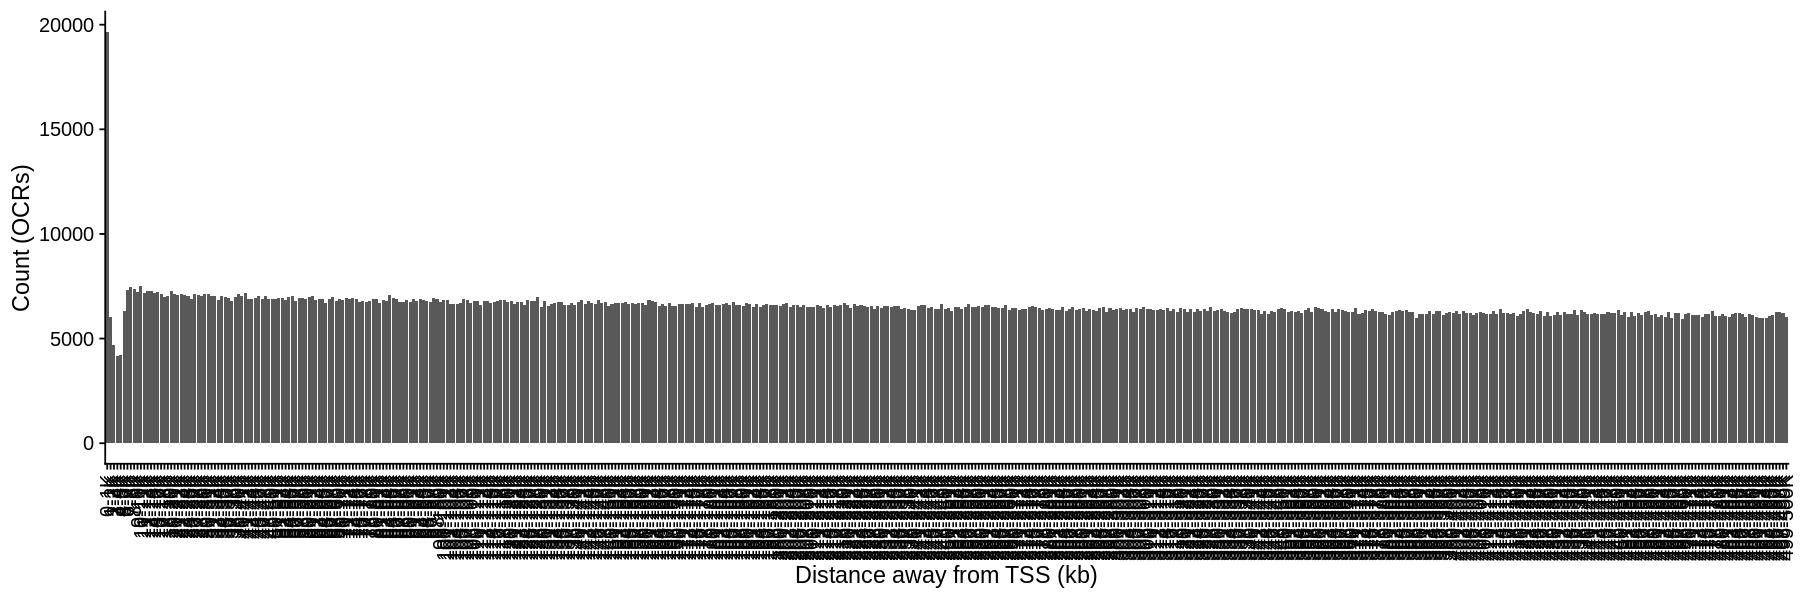

In [36]:
dat = dat_count
dat = dat %>% dplyr::mutate(Label = factor(Label, levels=label))

gpt = ggplot(dat, aes(x=Label, y=Count)) +
   geom_col() +
   labs(x="Distance away from TSS (kb)", y="Count (OCRs)") + 
   theme_cowplot() +
   theme(
       axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))

options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

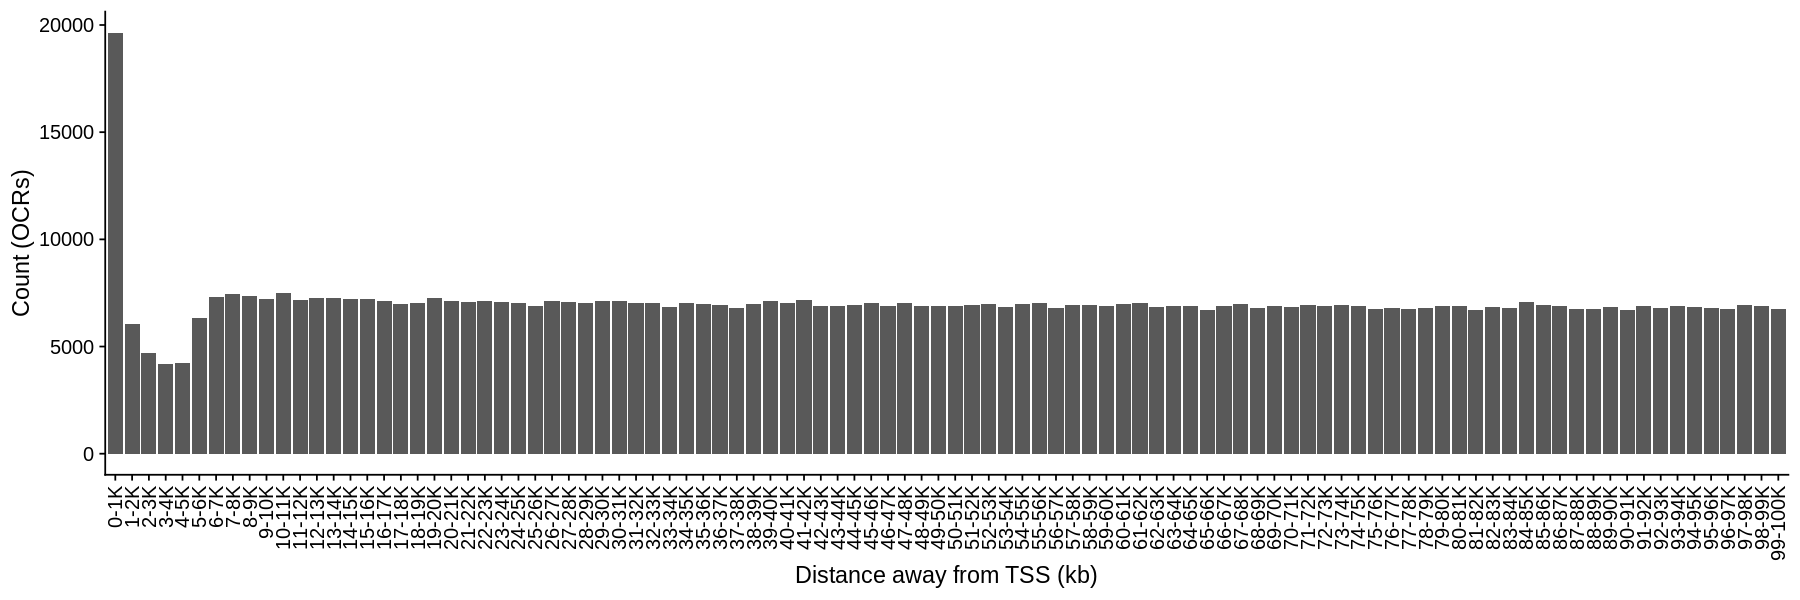

In [33]:
dat = dat_count
vec = label[1:100]
dat = dat %>% 
    dplyr::filter(Label %in% vec) %>%
    dplyr::mutate(Label = factor(Label, levels=vec))

gpt = ggplot(dat, aes(x=Label, y=Count)) +
   geom_col() +
   labs(x="Distance away from TSS (kb)", y="Count (OCRs)") + 
   theme_cowplot() +
   theme(
       axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))

options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

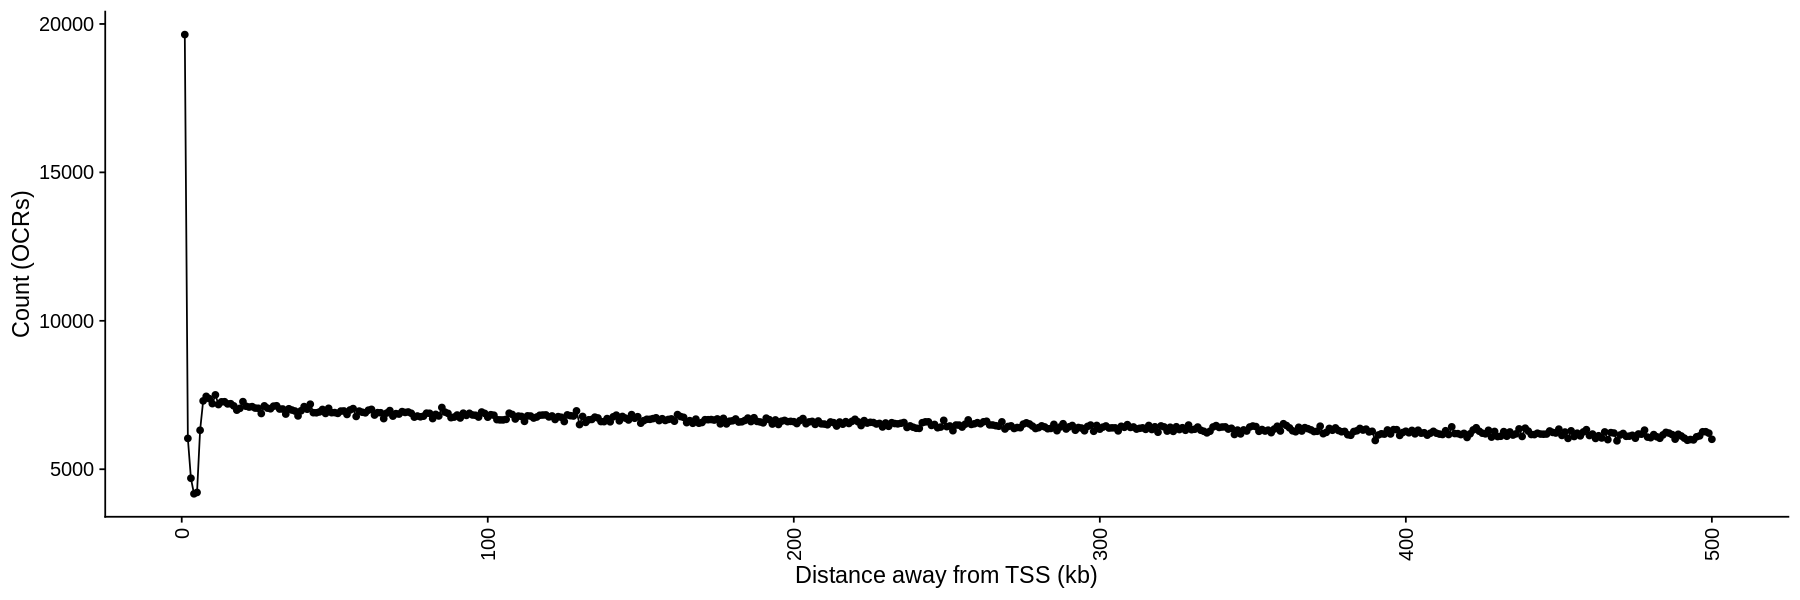

In [50]:
dat = dat_count
dat = dat %>% 
    dplyr::mutate(Label = str_remove(Label, "K")) %>%
    tidyr::separate(Label, c("Start", "End"), sep="-") %>%
    dplyr::mutate(
        Start = as.integer(Start),
        End   = as.integer(End)
    )

gpt = ggplot(dat, aes(x=End, y=Count)) +
   geom_line() +
   geom_point() +
   labs(x="Distance away from TSS (kb)", y="Count (OCRs)") + 
   xlim(0, 500) +
   theme_cowplot() +
   theme(
       axis.text.x = element_text(angle=90, vjust=0.5, hjust=1))

options(repr.plot.height=5, repr.plot.width=15)
print(gpt)